In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "C:\\Users\\HP\\Downloads\\archive (2)\\dogs_vs_cats",
    labels='inferred',
    label_mode='int', # Cats and dogs will get their own integer labels
    batch_size=32,
    image_size=(256,256)
)
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
validation_ds = keras.utils.image_dataset_from_directory(
      directory = "C:\\Users\\HP\\Downloads\\archive (2)\\dogs_vs_cats",
      labels= 'inferred',
      label_mode= 'int',
      batch_size = 32,
      image_size=(256,256)
)    
    

Found 146 files belonging to 1 classes.
Found 146 files belonging to 1 classes.


In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10


5/5 [==============================] - 22s 3s/step - loss: 0.6133 - accuracy: 0.8082 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: 0.2629 - accuracy: 0.9932 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 4.3342e-16 - accuracy: 1.0000 - val_loss: 5.2321e-27 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 0.1879 - accuracy: 0.9932 - val_loss: 1.1821e-24 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 2.6625e-33 - accuracy: 1.0000 - val_loss: 2.5259e-35 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 16s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accur

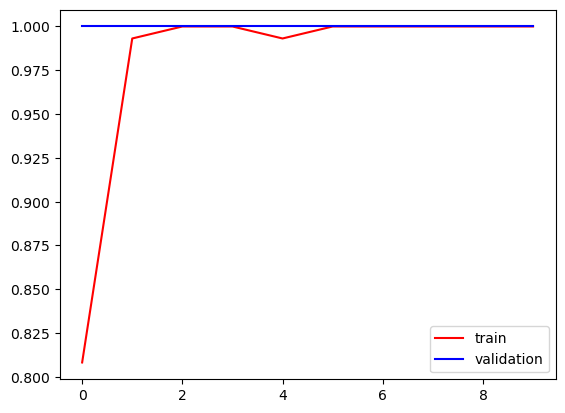

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


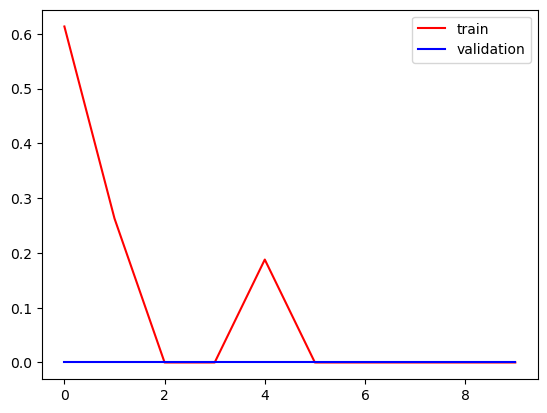

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [32]:
import cv2

In [38]:
test_img= cv2.imread("C:\\Users\\HP\\Desktop\\Dog.jpg")


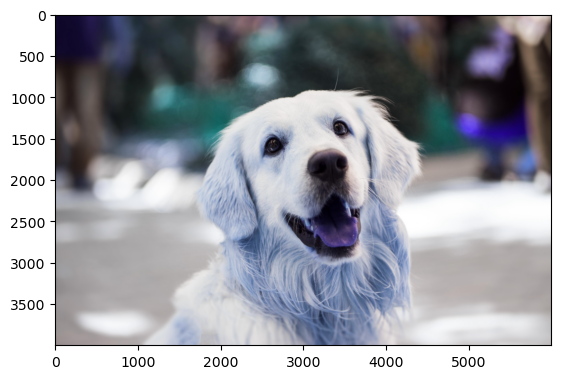

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape


(4000, 6000, 3)

In [41]:
test_img = cv2.resize(test_img,(256,256))


In [42]:
test_input = test_img.reshape((1,256,256,3))


In [43]:
model.predict(test_input)


1/1 [==============================] - 0s 331ms/step


array([[0.]], dtype=float32)

In [45]:
test_img = cv2.imread("C:\\Users\\HP\\Desktop\\cat.jpeg")


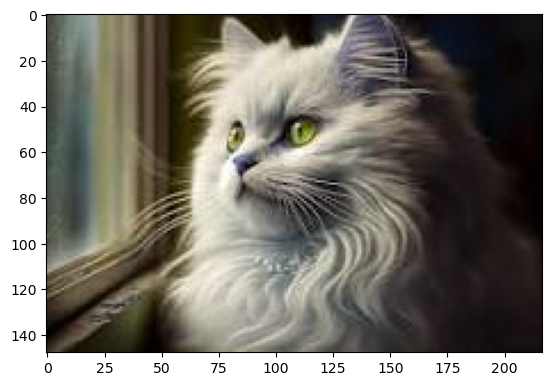

In [46]:
plt.imshow(test_img)


In [47]:
test_img.shape


(148, 217, 3)

In [48]:
test_img = cv2.resize(test_img,(256,256))


In [49]:
test_input = test_img.reshape((1,256,256,3))


In [50]:
model.predict(test_input)


1/1 [==============================] - 0s 65ms/step


array([[0.]], dtype=float32)